In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from scipy import stats
import os

In [2]:
path = "C:\\Users\\owner\\Documents\\Capstone Project-1\\age_gender_bkts.csv"
pwd= os.getcwd()
os.chdir(path)
#Load the data into the DataFrames
age_gender = pd.read_csv('age_gender_bkts.csv',encoding='utf-8')
age_gender.head(2)

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0


In [3]:
len(age_gender)

420

In [4]:
age_gender.describe()

,population_in_thousands,year
count,420.000000,420.0
mean,1743.133333,2015.0
std,2509.843202,0.0
min,0.000000,2015.0
25%,396.500000,2015.0
50%,1090.500000,2015.0
75%,1968.000000,2015.0
max,11601.000000,2015.0


In [5]:
path = "C:\\Users\\owner\\Documents\\Capstone Project-1\\countries.csv"
pwd= os.getcwd()
os.chdir(path)
countries=pd.read_csv('countries.csv',encoding='utf-8')
countries.head(2)

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.0
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.0


In [6]:
path = "C:\\Users\\owner\\Documents\\Capstone Project-1\\sessions.csv"
pwd= os.getcwd()
os.chdir(path)
sessions=pd.read_csv('sessions.csv',encoding='utf-8')
sessions.head(2)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0


In [7]:
path = "C:\\Users\\owner\\Documents\\Capstone Project-1\\train_users_2.csv"
pwd= os.getcwd()
os.chdir(path)
train_users=pd.read_csv('train_users_2.csv',encoding='utf-8')

In [8]:
path = "C:\\Users\\owner\\Documents\\Capstone Project-1\\test_users.csv"
pwd= os.getcwd()
os.chdir(path)
test_users=pd.read_csv('test_users.csv',encoding='utf-8')

In [9]:
users=pd.concat([train_users,test_users],ignore_index=True)
##The id of the user has been dropped for now
users.drop('id',axis=1,inplace=True)
users.head(10)

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20091208061105
5,other,other,NaN,US,2010-01-01,2010-01-02,omg,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20100101215619
6,other,craigslist,46.0,US,2010-01-02,2010-01-05,untracked,Safari,Mac Desktop,FEMALE,en,Web,0,basic,20100102012558
7,direct,direct,47.0,US,2010-01-03,2010-01-13,omg,Safari,Mac Desktop,FEMALE,en,Web,0,basic,20100103191905
8,other,craigslist,50.0,US,2010-01-04,2010-07-29,untracked,Safari,Mac Desktop,FEMALE,en,Web,0,basic,20100104004211
9,other,craigslist,46.0,US,2010-01-04,2010-01-04,omg,Firefox,Mac Desktop,-unknown-,en,Web,0,basic,20100104023758


In [10]:
len(users)

275547

# Inferential Statistics

There are 275547 users.However,the age_gender data file contains only 420 of them.Therefore,I would be using the age_gender file
as my sample file.

In [ ]:
x=age_gender
x

In [ ]:
age_gender.shape

In [ ]:
age_gender.drop('year',axis=1,inplace=True)

In [ ]:
age_gender

Now,let's handle those missing values.Initially,let's see what are the columns the gender column has.

In [ ]:
x.sort_values('gender')

In [ ]:
x.gender.value_counts()

There are no missing values in the gender column.This is equally distributed data where there are 210 males and 210 females.We
can use this distribution as $Bernouli's$  $Distribution$ to make a comparison of male vs. female population that want to travel inside and outside U.S.Let's look at the destination column if there is any missing values or not.

In [ ]:
x.country_destination.value_counts()

In [ ]:
x=age_gender
x=x.groupby(['gender','country_destination']).size()
y=x.unstack('gender')#.plot(kind='bar')
y

In [11]:
users=pd.concat([train_users,test_users],ignore_index=True)
##The id of the user has been dropped for now
users.drop('id',axis=1,inplace=True)
users.head(2)

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809


Now,let's separate the male population and the female population in two separate groups.Among this groups,the people those who want to stay in U.S. for their vacation destination,let's classify them as 1 and those who want to travel outside U.S.,classify them as 0.This is now a $Bernouli's$ $Distribution$.

In [12]:
users['destination'] = [1 if x == 'US' else 0 for x in users.country_destination]

In [13]:
users.destination

0         0
1         0
2         1
3         0
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        0
12        0
13        0
14        0
15        0
16        0
17        1
18        0
19        0
20        1
21        1
22        1
23        0
24        0
25        0
26        0
27        1
28        0
29        1
         ..
275517    0
275518    0
275519    0
275520    0
275521    0
275522    0
275523    0
275524    0
275525    0
275526    0
275527    0
275528    0
275529    0
275530    0
275531    0
275532    0
275533    0
275534    0
275535    0
275536    0
275537    0
275538    0
275539    0
275540    0
275541    0
275542    0
275543    0
275544    0
275545    0
275546    0
Name: destination, dtype: int64

In [14]:
b=users.ix[users.gender == 'MALE','destination']
b

1         0
21        1
31        0
33        0
34        0
37        0
40        0
53        0
58        1
61        0
64        0
85        1
88        0
89        0
96        1
114       0
128       1
138       0
141       0
147       1
164       0
173       0
181       1
182       1
185       0
201       1
215       0
219       0
224       1
233       1
         ..
275396    0
275411    0
275413    0
275416    0
275420    0
275428    0
275429    0
275436    0
275439    0
275440    0
275441    0
275445    0
275446    0
275451    0
275455    0
275457    0
275460    0
275478    0
275487    0
275490    0
275495    0
275497    0
275502    0
275509    0
275527    0
275530    0
275534    0
275535    0
275538    0
275540    0
Name: destination, dtype: int64

In [19]:
b.shape

(68209,)

In [16]:
a = users.ix[users.gender == 'FEMALE','destination']
a

2         1
3         0
6         1
7         1
8         1
10        1
11        0
13        0
14        0
15        0
19        0
24        0
25        0
27        1
36        1
39        0
41        1
42        0
45        1
56        0
65        0
71        0
74        0
75        1
77        0
81        1
84        1
86        1
87        0
94        1
         ..
275422    0
275427    0
275433    0
275438    0
275443    0
275447    0
275452    0
275458    0
275463    0
275464    0
275465    0
275473    0
275474    0
275475    0
275481    0
275482    0
275485    0
275493    0
275494    0
275500    0
275505    0
275506    0
275508    0
275518    0
275520    0
275521    0
275526    0
275532    0
275536    0
275546    0
Name: destination, dtype: int64

In [20]:
a.shape

(77524,)

In [17]:
c=pd.concat([a,b],ignore_index=True)
c

0         1
1         0
2         1
3         1
4         1
5         1
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        1
14        1
15        0
16        1
17        0
18        1
19        0
20        0
21        0
22        0
23        1
24        0
25        1
26        1
27        1
28        0
29        1
         ..
145703    0
145704    0
145705    0
145706    0
145707    0
145708    0
145709    0
145710    0
145711    0
145712    0
145713    0
145714    0
145715    0
145716    0
145717    0
145718    0
145719    0
145720    0
145721    0
145722    0
145723    0
145724    0
145725    0
145726    0
145727    0
145728    0
145729    0
145730    0
145731    0
145732    0
Name: destination, dtype: int64

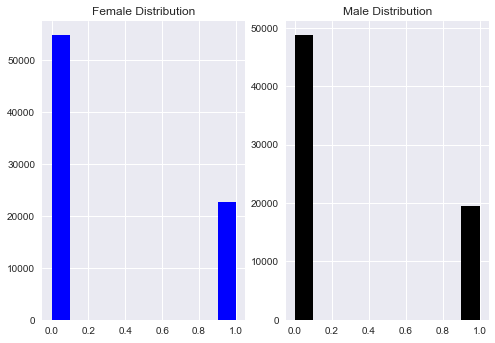

In [22]:
plt.subplot(1,2,1)
plt.hist(a,color='blue')
plt.title('Female Distribution')
plt.subplot(1,2,2)
plt.hist(b,color='black')
plt.title('Male Distribution')

Let's do a Hypothesis Test where:

$H$o$ = No difference between the mean value of the Male Population and the mean value of the Female Population =Pm=Pf

$H$1$ = There is a differece between the mean value of the Male Population and the mean value of the Female Population = Pm ≠ Pf

This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [23]:
stats.ttest_ind(a,b,equal_var=True)

Ttest_indResult(statistic=3.1423785772168351, pvalue=0.001676147617343367)

The p-value is 0.00167814.We can use this test, if we observe two independent samples from the same or different population, e.g. exam scores of boys and girls or of two ethnic groups. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

Since, the p-value is very smaller than the threshold, then we can safely reject the Null Hypothesis of equal mean value of male and female population average.

In [24]:
u=users
u=u[u.gender == '-unknown-']
u

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active,destination
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,facebook,20090319043255,0
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20091208061105,1
5,other,other,NaN,US,2010-01-01,2010-01-02,omg,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20100101215619,1
9,other,craigslist,46.0,US,2010-01-04,2010-01-04,omg,Firefox,Mac Desktop,-unknown-,en,Web,0,basic,20100104023758,1
12,direct,direct,NaN,FR,2010-01-05,2010-01-18,NaN,-unknown-,Other/Unknown,-unknown-,en,Web,0,basic,20100105060859,0
16,other,craigslist,NaN,NDF,2010-01-07,NaN,NaN,-unknown-,Other/Unknown,-unknown-,en,Web,0,basic,20100107215125,0
17,other,craigslist,31.0,US,2010-01-07,2010-01-09,NaN,-unknown-,Other/Unknown,-unknown-,en,Web,0,basic,20100107224625,1
18,seo,facebook,NaN,NDF,2010-01-08,NaN,NaN,-unknown-,Other/Unknown,-unknown-,en,Web,0,basic,20100108015641,0
20,direct,direct,NaN,US,2010-01-10,2010-01-18,NaN,-unknown-,Other/Unknown,-unknown-,en,Web,0,basic,20100110152120,1
22,seo,google,40.0,US,2010-01-11,2010-01-11,untracked,-unknown-,iPhone,-unknown-,en,Web,0,basic,20100111031438,1


Missing Values Filling Parameters There are in total 129480 values that are unknown in the gender. Those can be termed as missing values and are replaced by NaN values.

In [ ]:
users.gender.replace('-unknown-',np.nan,inplace=True)
users.sort_values('gender')

In [ ]:
users.gender.describe()

In [ ]:
users.sort_values('gender')

In [ ]:
df=users.set_index('gender')
df

In [ ]:
users.gender.describe()

In [ ]:
u=users.groupby(['gender','country_destination']).size()
u=u.unstack('gender')
u#.value_counts()

In [ ]:
df=users
df=df[(df.gender == 'FEMALE') | (df.gender == 'MALE')]
df.sort_values('gender')

In [ ]:
df.groupby(['gender','country_destination']).size()

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [25]:
users.describe()

,age,signup_flow,timestamp_first_active,destination
count,158681.000000,275547.000000,2.755470e+05,275547.000000
mean,47.145310,4.291965,2.013310e+13,0.226372
std,142.629468,8.794313,9.146438e+09,0.418483
min,1.000000,0.000000,2.009032e+13,0.000000
25%,28.000000,0.000000,2.013040e+13,0.000000
50%,33.000000,0.000000,2.014010e+13,0.000000
75%,42.000000,1.000000,2.014062e+13,0.000000
max,2014.000000,25.000000,2.014093e+13,1.000000


In [26]:
users.head(2)

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active,destination
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,facebook,20090319043255,0
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809,0


KeyboardInterrupt: 

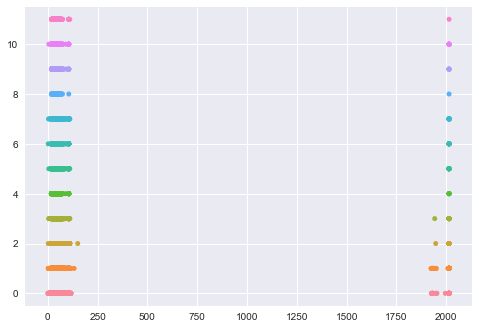

In [27]:
df=users
sns.swarmplot(x="age",y="country_destination",data=df)

In [ ]:
help(sns.swarmplot)

In [ ]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y